# Allocate Benchmarks

In [24]:
# select measurement file
file_name = "../output/2024-11-07 18-25-43 full.json"

# select style options
grey_fill_between = False

enable_storage_reference = False

if grey_fill_between:
    fill_between_args = {"color": "grey"}
else:
    fill_between_args = {}

In [25]:
# parse data
import json

with open(file_name) as file:
    raw_data = json.load(file)

In [26]:
from util.convert import convert_data
from IPython.core.display import HTML

# filter and convert data
deallocate_min = convert_data(raw_data, "deallocate_min", ["mean", "min", "max", "options.object_size", "machine_name", "cold_start", "repetitions"])
deallocate_max = convert_data(raw_data, "deallocate_max", ["mean", "min", "max", "options.object_size", "machine_name", "cold_start", "repetitions"])
deallocate_case1 = convert_data(raw_data, "deallocate_case_1", ["mean", "min", "max", "options.object_size", "machine_name", "cold_start", "repetitions"])

display(HTML("<b>MIN Data:</b>"))
display(deallocate_min.head())
display(HTML("<b>MAX Data:</b>"))
display(deallocate_max.head())
display(HTML("<b>Case 1 Data:</b>"))
display(deallocate_case1.head())

,mean,min,max,options.object_size,machine_name,cold_start,repetitions,ticks_per_ms
0,2078.760,2078,2079,0,esp32c3,100,1000,16000
1,2082.201,2082,2083,32,esp32c3,100,1000,16000
2,2082.198,2082,2083,64,esp32c3,100,1000,16000
3,2082.000,2082,2082,96,esp32c3,100,1000,16000
4,2082.000,2082,2082,128,esp32c3,100,1000,16000


,mean,min,max,options.object_size,machine_name,cold_start,repetitions,ticks_per_ms
0,64676.066,64676,64677,0,esp32c3,100,1000,16000
1,50507.000,50507,50507,32,esp32c3,100,1000,16000
2,45958.830,45958,45959,64,esp32c3,100,1000,16000
3,41544.669,41544,41545,96,esp32c3,100,1000,16000
4,41875.001,41875,41876,128,esp32c3,100,1000,16000


,mean,min,max,options.object_size,machine_name,cold_start,repetitions,ticks_per_ms
0,21627.000,21627,21627,0,esp32c3,100,1000,16000
1,6994.864,6994,7056,32,esp32c3,100,1000,16000
2,2115.399,2115,2116,64,esp32c3,100,1000,16000
3,2115.398,2115,2116,96,esp32c3,100,1000,16000
4,2116.000,2116,2116,128,esp32c3,100,1000,16000


In [27]:
from util.convert import scale_data

for (dataset, name) in [(deallocate_min, "MIN"), (deallocate_max, "MAX"), (deallocate_case1, "CASE 1")]:
    scaled_data = scale_data(dataset, "us")
    display(HTML(f"<b>{name}:</b>"))
    display(scaled_data["mean"].agg(["min", "max"]))

min    129.922500
max    132.346625
Name: mean, dtype: float64

min    2029.643750
max    4042.254125
Name: mean, dtype: float64

min     132.212312
max    1351.687500
Name: mean, dtype: float64

In [28]:

from util.convert import get_storage_measurement
from IPython.core.display import HTML

(storage_read, storage_write) = get_storage_measurement(raw_data, deallocate_max["options.object_size"].max())

display(HTML("<b>READ Data:</b>"))
display(storage_read.head())
display(HTML("<b>WRITE Data:</b>"))
display(storage_write.head())

,mean,min,max,options.object_size,machine_name,cold_start,repetitions,ticks_per_ms
0,610.399,610,611,0,esp32c3,100,1000,16000
1,1074.200,1074,1075,32,esp32c3,100,1000,16000
2,1405.006,1404,1406,64,esp32c3,100,1000,16000
3,1869.197,1869,1870,96,esp32c3,100,1000,16000
4,2200.401,2200,2201,128,esp32c3,100,1000,16000


,mean,min,max,options.object_size,machine_name,cold_start,repetitions,ticks_per_ms
0,1128.000,1128,1128,0,esp32c3,100,1000,16000
1,1511.583,1511,1512,32,esp32c3,100,1000,16000
2,1765.796,1765,1766,64,esp32c3,100,1000,16000
3,2150.403,2150,2151,96,esp32c3,100,1000,16000
4,2404.564,2404,2405,128,esp32c3,100,1000,16000


# Final Plot

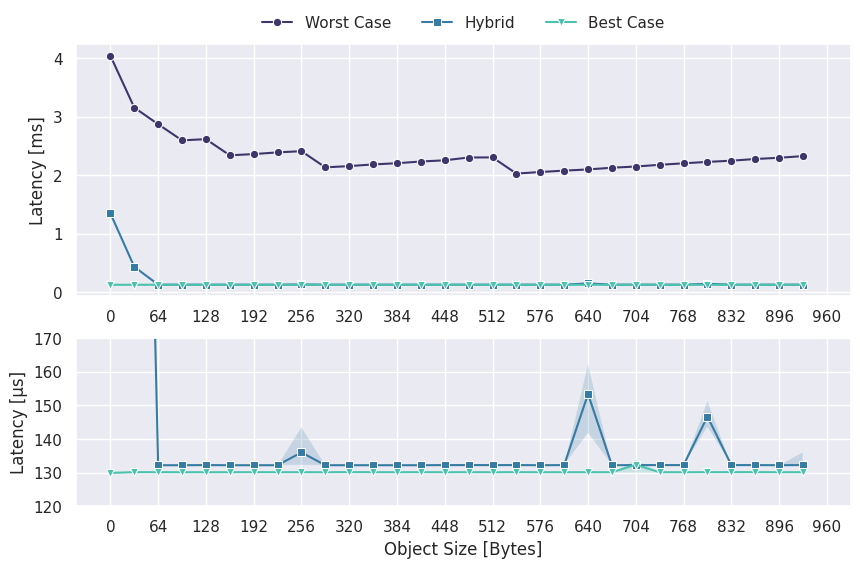

In [33]:
from util.plot import set_grid, save_plot, set_theme
from util.convert import scale_data
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

set_theme()

fig = plt.figure(1)
fig.set_figheight(6)
fig.set_figwidth(10)

gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[1.5, 1])

ax = plt.subplot(gs[0])

unit = "ms"

if enable_storage_reference and len(storage_write) != 0:
    storage_write_scaled = scale_data(storage_write, unit)
    sns.lineplot(ax=ax, x=storage_write_scaled["options.object_size"], y=storage_write_scaled["mean"], label="Raw Write", markers=["o"], marker="X", color="#aaaaaa")

if len(deallocate_max) != 0:
    deallocate_max_scaled = scale_data(deallocate_max, unit)
    sns.lineplot(ax=ax, x=deallocate_max_scaled["options.object_size"], y=deallocate_max_scaled["mean"], label="Worst Case", markers=["o"], marker="o")
    ax.fill_between(deallocate_max_scaled["options.object_size"], deallocate_max_scaled["min"], deallocate_max_scaled["max"], alpha=0.2, **fill_between_args)

if len(deallocate_case1) != 0:
    deallocate_case1_scaled = scale_data(deallocate_case1, unit)
    sns.lineplot(ax=ax, x=deallocate_case1_scaled["options.object_size"], y=deallocate_case1_scaled["mean"], label="Hybrid", markers=["o"], marker="s")
    ax.fill_between(deallocate_case1_scaled["options.object_size"], deallocate_case1_scaled["min"], deallocate_case1_scaled["max"], alpha=0.2, **fill_between_args)


if len(deallocate_min) != 0:
    deallocate_min_scaled = scale_data(deallocate_min, unit)
    sns.lineplot(ax=ax, x=deallocate_min_scaled["options.object_size"], y=deallocate_min_scaled["mean"], label="Best Case", markers=["o"], marker="v")
    ax.fill_between(deallocate_min_scaled["options.object_size"], deallocate_min_scaled["min"], deallocate_min_scaled["max"], alpha=0.2, **fill_between_args)

set_grid(64, max(deallocate_min["options.object_size"].max(), deallocate_max["options.object_size"].max()), ax)

ax.set_xlabel(None)
ax.set_ylabel(f"Latency [{unit}]")
#ax.set_ylim(bottom=-0.5, top=5)


if enable_storage_reference:
    handles, labels = plt.gca().get_legend_handles_labels()
    handles.append(handles.pop(0))
    labels.append(labels.pop(0))
    ax.legend(handles, labels, loc = "lower center", bbox_to_anchor=(.5, 1), ncol=len(ax.legend().get_lines()), title=None, frameon=False)
else:
    ax.legend(loc = "lower center", bbox_to_anchor=(.5, 1), ncol=len(ax.legend().get_lines()), title=None, frameon=False)


set_theme(3, 1)

ax = plt.subplot(gs[1])

# unit = "ms"
unit = "µs"

# if len(deallocate_max) != 0:
#     deallocate_max_scaled = scale_data(deallocate_max, unit)
#     sns.lineplot(ax=ax, x=deallocate_max_scaled["options.object_size"], y=deallocate_max_scaled["mean"], label="Worst Case", markers=["o"], marker="o")
#     ax.fill_between(deallocate_max_scaled["options.object_size"], deallocate_max_scaled["min"], deallocate_max_scaled["max"], alpha=0.2, **fill_between_args)

if enable_storage_reference and len(storage_write) != 0:
    storage_write_scaled = scale_data(storage_write, unit)
    sns.lineplot(ax=ax, x=storage_write_scaled["options.object_size"], y=storage_write_scaled["mean"], label="Raw Write", markers=["o"], marker="X", color="#aaaaaa")


if len(deallocate_case1) != 0:
    deallocate_case1_scaled = scale_data(deallocate_case1, unit)
    sns.lineplot(ax=ax, x=deallocate_case1_scaled["options.object_size"], y=deallocate_case1_scaled["mean"], label="Additional Example", markers=["o"], marker="s")
    ax.fill_between(deallocate_case1_scaled["options.object_size"], deallocate_case1_scaled["min"], deallocate_case1_scaled["max"], alpha=0.2, **fill_between_args)


if len(deallocate_min) != 0:
    deallocate_min_scaled = scale_data(deallocate_min, unit)
    sns.lineplot(ax=ax, x=deallocate_min_scaled["options.object_size"], y=deallocate_min_scaled["mean"], label="Best Case", markers=["o"], marker="v")
    ax.fill_between(deallocate_min_scaled["options.object_size"], deallocate_min_scaled["min"], deallocate_min_scaled["max"], alpha=0.2, **fill_between_args)

set_grid(64, max(deallocate_min["options.object_size"].max(), deallocate_max["options.object_size"].max()), ax)

ax.set_xlabel("Object Size [Bytes]")
ax.set_ylabel(f"Latency [{unit}]")
ax.set_ylim(bottom=120, top=170)
ax.get_legend().remove()


save_plot("deallocate", save_asset=True)

# Same Plot in Presentation Style

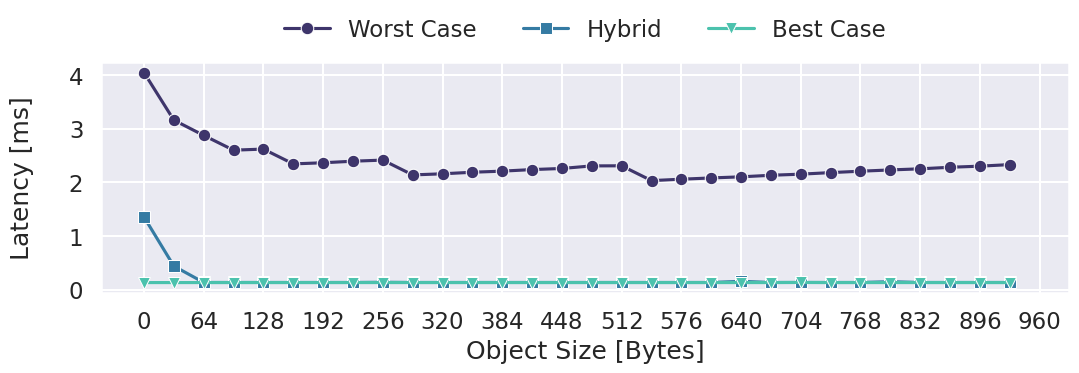

In [30]:
from util.plot import set_grid, save_plot, set_theme
from util.convert import scale_data
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

set_theme()
sns.set_context(context="talk")

fig = plt.figure(1)
fig.set_figheight(3)
fig.set_figwidth(12.5)

gs = gridspec.GridSpec(nrows=1, ncols=1)
ax = plt.subplot(gs[0])

unit = "ms"

if enable_storage_reference and len(storage_write) != 0:
    storage_write_scaled = scale_data(storage_write, unit)
    sns.lineplot(ax=ax, x=storage_write_scaled["options.object_size"], y=storage_write_scaled["mean"], label="Raw Write", markers=["o"], marker="X", color="#aaaaaa")

if len(deallocate_max) != 0:
    deallocate_max_scaled = scale_data(deallocate_max, unit)
    sns.lineplot(ax=ax, x=deallocate_max_scaled["options.object_size"], y=deallocate_max_scaled["mean"], label="Worst Case", markers=["o"], marker="o")
    ax.fill_between(deallocate_max_scaled["options.object_size"], deallocate_max_scaled["min"], deallocate_max_scaled["max"], alpha=0.2, **fill_between_args)

if len(deallocate_case1) != 0:
    deallocate_case1_scaled = scale_data(deallocate_case1, unit)
    sns.lineplot(ax=ax, x=deallocate_case1_scaled["options.object_size"], y=deallocate_case1_scaled["mean"], label="Hybrid", markers=["o"], marker="s")
    ax.fill_between(deallocate_case1_scaled["options.object_size"], deallocate_case1_scaled["min"], deallocate_case1_scaled["max"], alpha=0.2, **fill_between_args)


if len(deallocate_min) != 0:
    deallocate_min_scaled = scale_data(deallocate_min, unit)
    sns.lineplot(ax=ax, x=deallocate_min_scaled["options.object_size"], y=deallocate_min_scaled["mean"], label="Best Case", markers=["o"], marker="v")
    ax.fill_between(deallocate_min_scaled["options.object_size"], deallocate_min_scaled["min"], deallocate_min_scaled["max"], alpha=0.2, **fill_between_args)

set_grid(64, max(deallocate_min["options.object_size"].max(), deallocate_max["options.object_size"].max()), ax)

if enable_storage_reference:
    handles, labels = plt.gca().get_legend_handles_labels()
    handles.append(handles.pop(0))
    labels.append(labels.pop(0))
    ax.legend(handles, labels, loc = "lower center", bbox_to_anchor=(.5, 1), ncol=len(ax.legend().get_lines()), title=None, frameon=False)
else:
    ax.legend(loc = "lower center", bbox_to_anchor=(.5, 1), ncol=len(ax.legend().get_lines()), title=None, frameon=False)


set_grid(64, max(deallocate_min["options.object_size"].max(), deallocate_max["options.object_size"].max()), ax)

ax.set_xlabel("Object Size [Bytes]")
ax.set_ylabel(f"Latency [{unit}]", labelpad=25)

plt.savefig(f"../figures/deallocate_presentation_1.pdf", bbox_inches='tight', facecolor='#fafafa')

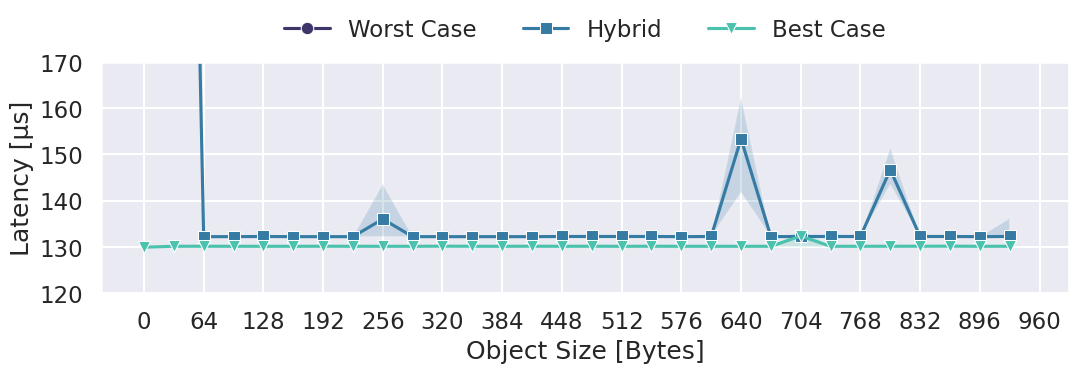

In [34]:
from util.plot import set_grid, save_plot, set_theme
from util.convert import scale_data
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

set_theme()
sns.set_context(context="talk")

fig = plt.figure(1)
fig.set_figheight(3)
fig.set_figwidth(12.5)

gs = gridspec.GridSpec(nrows=1, ncols=1)
ax = plt.subplot(gs[0])

# unit = "ms"
unit = "µs"

if len(deallocate_max) != 0:
    deallocate_max_scaled = scale_data(deallocate_max, unit)
    sns.lineplot(ax=ax, x=deallocate_max_scaled["options.object_size"], y=deallocate_max_scaled["mean"], label="Worst Case", markers=["o"], marker="o")
    ax.fill_between(deallocate_max_scaled["options.object_size"], deallocate_max_scaled["min"], deallocate_max_scaled["max"], alpha=0.2, **fill_between_args)

if enable_storage_reference and len(storage_write) != 0:
    storage_write_scaled = scale_data(storage_write, unit)
    sns.lineplot(ax=ax, x=storage_write_scaled["options.object_size"], y=storage_write_scaled["mean"], label="Raw Write", markers=["o"], marker="X", color="#aaaaaa")


if len(deallocate_case1) != 0:
    deallocate_case1_scaled = scale_data(deallocate_case1, unit)
    sns.lineplot(ax=ax, x=deallocate_case1_scaled["options.object_size"], y=deallocate_case1_scaled["mean"], label="Hybrid", markers=["o"], marker="s")
    ax.fill_between(deallocate_case1_scaled["options.object_size"], deallocate_case1_scaled["min"], deallocate_case1_scaled["max"], alpha=0.2, **fill_between_args)


if len(deallocate_min) != 0:
    deallocate_min_scaled = scale_data(deallocate_min, unit)
    sns.lineplot(ax=ax, x=deallocate_min_scaled["options.object_size"], y=deallocate_min_scaled["mean"], label="Best Case", markers=["o"], marker="v")
    ax.fill_between(deallocate_min_scaled["options.object_size"], deallocate_min_scaled["min"], deallocate_min_scaled["max"], alpha=0.2, **fill_between_args)

if enable_storage_reference:
    handles, labels = plt.gca().get_legend_handles_labels()
    handles.append(handles.pop(0))
    labels.append(labels.pop(0))
    ax.legend(handles, labels, loc = "lower center", bbox_to_anchor=(.5, 1), ncol=len(ax.legend().get_lines()), title=None, frameon=False)
else:
    ax.legend(loc = "lower center", bbox_to_anchor=(.5, 1), ncol=len(ax.legend().get_lines()), title=None, frameon=False)

set_grid(64, max(deallocate_min["options.object_size"].max(), deallocate_max["options.object_size"].max()), ax)

ax.set_xlabel("Object Size [Bytes]")
ax.set_ylabel(f"Latency [{unit}]")
ax.set_ylim(bottom=120, top=170)

plt.savefig(f"../figures/deallocate_presentation_2.pdf", bbox_inches='tight', facecolor='#fafafa')